In [45]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
clinical_trial_data_file= "data/clinicaltrial_data.csv"
mouse_drug_data_file = "data/mouse_drug_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_trial_data = pd.read_csv(clinical_trial_data_file)
mouse_drug_data = pd.read_csv(mouse_drug_data_file)

# Combine the data into a single dataset
mouse_clinical_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how='left')

mouse_clinical_data = mouse_clinical_data[(mouse_clinical_data["Drug"] == 'Capomulin') | 
                                          (mouse_clinical_data["Drug"] == 'Infubinol') |
                                          (mouse_clinical_data["Drug"] == 'Ketapril') | 
                                          (mouse_clinical_data["Drug"] == 'Placebo')]

# Display the data table for preview
mouse_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [46]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor_volume_data_grouped = mouse_clinical_data.groupby(['Drug','Timepoint']).mean()
mean_tumor_volume_data_grouped


# Convert to DataFrame
mean_tumor_volume_data_grouped_df = pd.DataFrame(mean_tumor_volume_data_grouped)
del mean_tumor_volume_data_grouped_df['Metastatic Sites']
mean_tumor_volume_data_grouped_df = mean_tumor_volume_data_grouped_df.reset_index()

# Preview DataFrame
mean_tumor_volume_data_grouped_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [47]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Calculate standard error on means
sem_tumor_volume_data_grouped = mouse_clinical_data.groupby(['Drug','Timepoint']).sem()
sem_tumor_volume_data_grouped

# Convert to DataFrame
sem_tumor_volume_data_grouped_df = pd.DataFrame(sem_tumor_volume_data_grouped)
del sem_tumor_volume_data_grouped_df['Metastatic Sites']
del sem_tumor_volume_data_grouped_df['Mouse ID']
sem_tumor_volume_data_grouped_df = sem_tumor_volume_data_grouped_df.reset_index()

# Preview DataFrame
sem_tumor_volume_data_grouped_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [48]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_data_grouped_pivot = mean_tumor_volume_data_grouped_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
sem_tumor_volume_data_grouped_pivot = sem_tumor_volume_data_grouped_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
# Preview that Reformatting worked
mean_tumor_volume_data_grouped_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


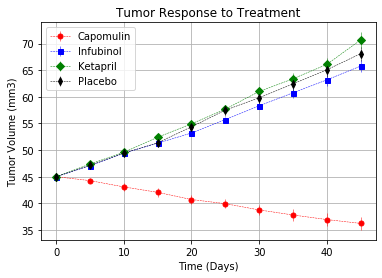

In [55]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_volume_data_grouped_pivot.index, mean_tumor_volume_data_grouped_pivot['Capomulin'], 
             yerr=sem_tumor_volume_data_grouped_pivot['Capomulin'],
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mean_tumor_volume_data_grouped_pivot.index, mean_tumor_volume_data_grouped_pivot['Infubinol'], 
             yerr=sem_tumor_volume_data_grouped_pivot['Infubinol'],
             color='blue', marker='s', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mean_tumor_volume_data_grouped_pivot.index, mean_tumor_volume_data_grouped_pivot['Ketapril'], 
             yerr=sem_tumor_volume_data_grouped_pivot['Ketapril'],
             color='green', marker='D', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mean_tumor_volume_data_grouped_pivot.index, mean_tumor_volume_data_grouped_pivot['Placebo'], 
             yerr=sem_tumor_volume_data_grouped_pivot['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5)


x_lim = len(mean_tumor_volume_data_grouped_pivot.index)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc='best')
plt.grid()

# Save the Figure
plt.savefig(os.path.join('figures','treatment.png'))

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [56]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_tumor_mresponse_data_grouped = mouse_clinical_data.groupby(['Drug','Timepoint']).mean()
del mean_tumor_mresponse_data_grouped['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor_mresponse_data_grouped_df = pd.DataFrame(mean_tumor_mresponse_data_grouped)
#mean_tumor_mresponse_data_grouped_df = mean_tumor_mresponse_data_grouped_df.reset_index()

# Preview DataFrame
mean_tumor_mresponse_data_grouped_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [57]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_tumor_mresponse_data_grouped = mouse_clinical_data.groupby(['Drug','Timepoint']).sem()
del sem_tumor_mresponse_data_grouped['Tumor Volume (mm3)']
del sem_tumor_mresponse_data_grouped['Mouse ID']
# Convert to DataFrame
sem_tumor_mresponse_data_grouped_df = pd.DataFrame(sem_tumor_mresponse_data_grouped)
#mean_tumor_mresponse_data_grouped_df = mean_tumor_mresponse_data_grouped_df.reset_index()

# Preview DataFrame
sem_tumor_mresponse_data_grouped_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [58]:
# Minor Data Munging to Re-Format the Data Frames_MEAN
mean_tumor_mresponse_data_grouped_pivot = mean_tumor_mresponse_data_grouped_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
sem_tumor_mresponse_data_grouped_pivot = sem_tumor_mresponse_data_grouped_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
# Preview that Reformatting worked
mean_tumor_mresponse_data_grouped_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


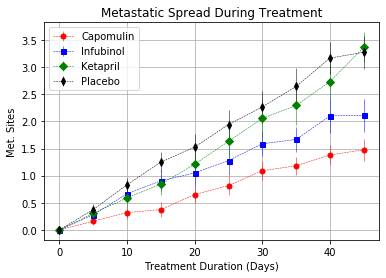

In [85]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_mresponse_data_grouped_pivot.index, mean_tumor_mresponse_data_grouped_pivot['Capomulin'], 
             yerr=sem_tumor_mresponse_data_grouped_pivot['Capomulin'],
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mean_tumor_mresponse_data_grouped_pivot.index, mean_tumor_mresponse_data_grouped_pivot['Infubinol'], 
             yerr=sem_tumor_mresponse_data_grouped_pivot['Infubinol'],
             color='blue', marker='s', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mean_tumor_mresponse_data_grouped_pivot.index, mean_tumor_mresponse_data_grouped_pivot['Ketapril'], 
             yerr=sem_tumor_mresponse_data_grouped_pivot['Ketapril'],
             color='green', marker='D', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mean_tumor_mresponse_data_grouped_pivot.index, mean_tumor_mresponse_data_grouped_pivot['Placebo'], 
             yerr=sem_tumor_mresponse_data_grouped_pivot['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5)
x_lim = len(mean_tumor_mresponse_data_grouped_pivot.index)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc='best')
plt.grid()

# Save the Figure
plt.savefig(os.path.join('figures','spread.png'))

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [64]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mouse_data_grouped = mouse_clinical_data.groupby(['Drug','Timepoint']).count()['Mouse ID']
#count_mouse_data_grouped = count_mouse_data_grouped.reset_index()

# Convert to DataFrame
count_mouse_data_grouped_df = pd.DataFrame({"Mouse Count": count_mouse_data_grouped})

# Preview DataFrame
count_mouse_data_grouped_df.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [65]:
# Minor Data Munging to Re-Format the Data Frames_MEAN
count_mouse_data_grouped_pivot = count_mouse_data_grouped_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')  
# Preview that Reformatting worked
count_mouse_data_grouped_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


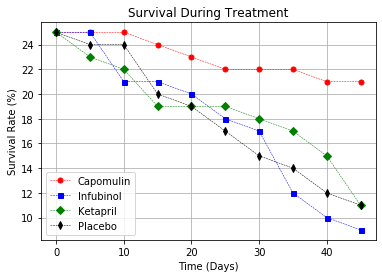

In [69]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(count_mouse_data_grouped_pivot.index, count_mouse_data_grouped_pivot['Capomulin'], 
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(count_mouse_data_grouped_pivot.index, count_mouse_data_grouped_pivot['Infubinol'], 
             color='blue', marker='s', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(count_mouse_data_grouped_pivot.index, count_mouse_data_grouped_pivot['Ketapril'], 
             color='green', marker='D', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(count_mouse_data_grouped_pivot.index, count_mouse_data_grouped_pivot['Placebo'], 
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(count_mouse_data_grouped_pivot.index)


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc='best')
plt.grid()

# Save the Figure
plt.savefig(os.path.join('figures','survival.png'))

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [70]:
# Calculate the percent changes for each drug
percent_change_by_drug =  ((mean_tumor_volume_data_grouped_pivot.iloc[-1]-mean_tumor_volume_data_grouped_pivot.iloc[0])/mean_tumor_volume_data_grouped_pivot.iloc[0]) * 100

# Display the data to confirm
percent_change_by_drug

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

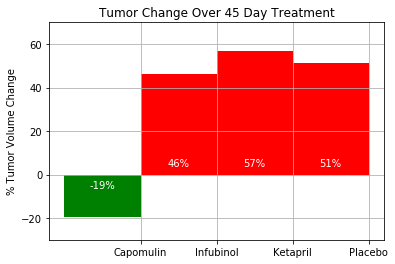

In [84]:
# Store all Relevant Percent Changes into a Tuple
drug_tuple = ('Capomulin', 'Infubinol','Ketapril','Placebo')

# Splice the data between passing and failing drugs
passing = percent_change_by_drug < 0

# Orient widths. Add labels, tick marks, etc. 
change_list = [(percent_change_by_drug[drug])for drug in drug_tuple]
change_plt = plt.bar(drug_tuple,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.xticks()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')


# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 3
        else:
            label_position = -7
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(change_plt)
plt.grid()

# Save the Figure
plt.savefig(os.path.join('figures','change.png'))

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
# Three observations about the results of the study:
# 1. Capomulin was the only drug which showed positive result and tumor reduction.
# 2. Metastatic spread was relatively better for Infubinol than for Ketapril and Placebo, however, after around 32nd day of treatment showed the lowest survival rate of the cohort.
# 3. At the end of the treatment Ketapril showed the same survival rate and metastatic spread as Placebo.